# LSA : Latent Semantic Analysis

### Major factor:  Synonymy and Polysemy,
Latent variable or hidden variable, combine words with similar meanings, like Computer, PC, Laptop are highly correlated, we think about some latent variable or hidden variable that represent all of them hence the term Latent Semantic Analysis comes. The job of LSA is to find these hidden/latent variables and transform the original data into these new variables and hopefully the dimensionality of this new data is much smaller than the original . And this allows us to speed up our computations. LSA helps to solve the synonymy problem by combining correlated variables. But conflicting viewpoint is that whether or not it helps with Polysemy

## The underlying maths behind LSA:
PCA(Principal Components Analysis) and SVD(Singular Value Decomposition to a term document matrix)
LSA is basically the concept of PCA and SVD.

## PCA (Principal Components Analysis)

PCA - PCA does a transformation on our input vectors z = Qx(This is the matrix multiplication). When you multiply a vector by a scalar then it gives us another vector in the same direction; but when you multiply a vector by a matrix, you could possibly get a vector in a different direction. PCA rotates our original input vectors; in another words its the same vecto but in a different cordinate system.


PCA does three things for us:
1) It decorrelates all of our input data, So our data in the new cordinate system has zero correlation between any two input feature
2) It orders each new dimension in decreasing order by its information content, so the first dimension carries the most information, the second dimension carries the less information than first but more than the third and so on.
3) The third thing it does is it allows us to reduce the dimensionality of our data. So if our original vocabulary was 1000 words, we might find that when we join all the words by how often they co-occur in each document, May be the total number of distinct latent terms is only 100, One perspective of PCA is that it does denoising, Noise is quite prevalent in NLP, because the vocabulary size is large. So by doing the smoothing or denoising we can actually generalize better when we look at new data.


since cutting off any of the higher dimensions if they contain, say, less than 5% of the total information, wont result a big loss, Note that by removing information you are not always reducing predictive ability, 

The central item in all these idea is the covariance matrix. The diagonals of covariance matrix tell us the variance of that direction and the off-diagonals tells us how correlated two dimensions are with each other.

PCA helps us combine input features. PCA finds thr correlation between input features and PCA on the transposed data finds correlations between the input samples.



The weird thing about PCA:
1) Still have D eigenvalues(covariance is N*N)
2) They are the same eigenvalues we found before

## Eigenvalues and Eigenvectors

By putting both eigenvalues and eigenvectors into matrices, Putting eigenvalues into a diagonal matrix called lambda. And putting eigenvectors into matrix called Q.
Lambda Matrix contains the eigenvalues is actually just the covariance of the transformed data.
So, since the off diagonals are zero, its a diagonal matrix, that means the transformed data is completely decorrelated.
And Since we are free to sort the eigenvalues in any order we wish we can ensure that the largest eigenvalues are just the variance of the transformed data.

So, usually in NLP we create a term-document matrix(dtm). Each term as an input dimension and each document as s sample, samples go along the rows and the input features go along the columns.
So in PCA, we just combine the similar terms.
But what if we want to combine similar documents?
Ans - Then we could just do PCA after transposing the original matrix.

Lambda = diagonal matrix of eigenvalues(There are D of them -> D*D matrix)
Q = matrix of stacked eigenvectors(There are D of them -> D*D matrix)

we sort 'Lambda' so the eigenvalues are in descending order.

## SVD (Singular Value Decomposition)

What SVD does?
It does both PCAs at the same time. We find eigenvectors of X times X transposed and we call that U; We find eigenvectors of X transposed times X and we call that V we can and the corresponding eigenvalues would be in descending order. In SVD we take the square root of the eigenvalues and put them into a matrix called S. Once we do all this,
These are related by :
X, U, S and V
By this formula:
X = U*S*V-transposed
And this is what we mean by decomposition.


#### With SVD we can also transform an input term by combining documents.
#### But in PCA we can only transform an input document by combining terms.

## LSA used for:
1) DR(Dimensionality Reduction) : DR is used to reduce the processing time(compression of data).
Dimensionality Reduction is itself is an application. Each word is represented by a vector. If that vector is a size of D the its typically going to take O(D) times to do anything on it such as calculating the distance between two vectors, but it could be worse situation where something might be polynomial in D, time taken would be O(D^p), therefore by reducing the size of the vector I reduce the time that it takes to perform operations on those vectors.
Dimensionality Reduction is useful because it allows us to see the data.
PCA is used for Dimensionality Reduction.
Processing after Dimensionality Reduction:
1) Clustering : Grouping of data based upon how close and how far the data.
2) Synonyms - Finding similar words. If one word can be equivalently used in place of another then their used vector structure should be similar and hence they should appear close together when the dimensionality is reduced. The Dimensionality Reduction also removes redundancy from data in mathematical terms, if one input feature is a linear combination of another then by definition, its completely redundant and hence adds no real information to the data set.
3) Polysemy : Polysemy is the same word with different meaning, ex - "Bat" it can be a cricket bat or it can be an mammal.

what is hand_score document used for? To check how close is this document related to the word "Bat" and then giving a high score to all the documents.


## Information Retrieval
By transforming each word into a small vector, you can then use that to build a search engine.
Basically it would work like a nearest neighbour search, each document is represented by vector., you can pass query and ask that which that which document is close to your query.
Dimensionality Reduction helps here, Since comparing each vector requires all of the time in a naive implementation. We can also be sure that the distance between query and result is based on mostly on signal, not noise. Search engine is not possible by string matching, It demands mathematical techniques like LSA.
### term document matrix:
A term document Matrix has the terms going down the rows and the documents going along the columns
    ~ v = number of terms(word) = number of samples
    ~ each row is a "feature vector"
In machine learning in general we know that each sample is represented by a feature vector.
### Feature vector:
If we are trying to predict the price of a house, the feature vector might be made up of 
x = (neighborhood, crime rate, number of schools nearby, population density)

## Dimensionality Reduction Algorithms
1) Independent Component Analysis(ICA) : It tries to separate each of the independent components signals given in the mixed signals, Ex - Cocktail party problem 
2) Factor Analysis.

## Drawbacks of PCA, SVD, ICA, FA(Factor Analysis)
They are all linear models
Non linear DR - in sklearn (t-SNE)

## Code example of LSA

### Data Preprocessing

In [6]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords

In [13]:
wornet_lemmatizer = WordNetLemmatizer()
titles = [lines.rstrip() for lines in open("data/all_book_titles.txt")]

In [18]:
# stopwords = stopwords.words('english')
# for token in tokens:
#     if token in stopwords.words('english'):
#         clean_tokens.remove(token)
with open('data/stopwords.txt') as fl:
    stopwords = fl.read()

stopwords = [word.strip().lower().replace('"',"") for word in stopwords.split(",")]

In [20]:
'etext' in stopwords

True

In [31]:
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove any digits, i.e. "3rd edition"
    return tokens


In [37]:
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []
error_count = 0
for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8') # this will throw exception if bad characters
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except Exception as e:
        print(e)
        print(title)
        error_count += 1


global name 'wordnet_lemmatizer' is not defined
Philosophy of Sex and Love A Reader
global name 'wordnet_lemmatizer' is not defined
Readings in Judaism, Christianity, and Islam
global name 'wordnet_lemmatizer' is not defined
Microprocessors Principles and Applications
global name 'wordnet_lemmatizer' is not defined
Bernhard Edouard Fernow: Story of North American Forestry
global name 'wordnet_lemmatizer' is not defined
Encyclopedia of Buddhism
global name 'wordnet_lemmatizer' is not defined
Motorola Microprocessor Family: 68000, 68008, 68010, 68020, 68030, and 68040, Programming and Interfacing with Applications
global name 'wordnet_lemmatizer' is not defined
American Anthem: Student Edition Modern Era 2007
global name 'wordnet_lemmatizer' is not defined
How to Read Literature Like a Professor A Lively and Entertaining Guide to Reading Between the Lines
global name 'wordnet_lemmatizer' is not defined
Men Are from Mars, Women Are from Venus Secrets of Great Sex, Improving Communication,

global name 'wordnet_lemmatizer' is not defined
Ecology: Concepts and Applications
global name 'wordnet_lemmatizer' is not defined
Environmental Science
global name 'wordnet_lemmatizer' is not defined
US: A Narrative History Volume 1: To 1877
global name 'wordnet_lemmatizer' is not defined
Differential Equations for Engineers and Scientists
global name 'wordnet_lemmatizer' is not defined
Elementary Statistics
global name 'wordnet_lemmatizer' is not defined
Film History: An Introduction
global name 'wordnet_lemmatizer' is not defined
Film Art: An Introduction
global name 'wordnet_lemmatizer' is not defined
The Art of Watching Films
global name 'wordnet_lemmatizer' is not defined
Studying Religion
global name 'wordnet_lemmatizer' is not defined
Fundamentals of Aerodynamics
global name 'wordnet_lemmatizer' is not defined
Vector Mechanics for Engineers: Statics and Dynamics
global name 'wordnet_lemmatizer' is not defined
Thermodynamics: An Engineering Approach
global name 'wordnet_lemmatiz

Advanced Accounting (11th Edition)
global name 'wordnet_lemmatizer' is not defined
Computer Science : An Overview
global name 'wordnet_lemmatizer' is not defined
Java How to Program (late Objects)
global name 'wordnet_lemmatizer' is not defined
Java How to Program
global name 'wordnet_lemmatizer' is not defined
Database Systems: Introduction to Databases and Data Warehouses
global name 'wordnet_lemmatizer' is not defined
Data Structures and Other Objects Using Java
global name 'wordnet_lemmatizer' is not defined
Data Structures and Algorithm Analysis in Java
global name 'wordnet_lemmatizer' is not defined
Neuro-Fuzzy and Soft Computing A Computational Approach to Learning and Machine Intelligence
global name 'wordnet_lemmatizer' is not defined
Educational Psychology (12th Edition)
global name 'wordnet_lemmatizer' is not defined
The Convergence of Race, Ethnicity, and Gender: Multiple Identities in Counseling (4th Edition) (Merrill Counseling)
global name 'wordnet_lemmatizer' is not def

Introductory Chemistry : Concepts and Critical Thinking
global name 'wordnet_lemmatizer' is not defined
Chemistry: A Molecular Approach (3rd Edition)
global name 'wordnet_lemmatizer' is not defined
General Chemistry : Atoms First
global name 'wordnet_lemmatizer' is not defined
Inorganic Chemistry
global name 'wordnet_lemmatizer' is not defined
Contemporary Human Geography (2nd Edition)
global name 'wordnet_lemmatizer' is not defined
Foundations of Earth Science with Masteringgeology
global name 'wordnet_lemmatizer' is not defined
Environmental Science: Toward a Sustainable Future (12th Edition)
global name 'wordnet_lemmatizer' is not defined
Foundations of Earth Science
global name 'wordnet_lemmatizer' is not defined
Physical Chemistry (3rd Edition)
global name 'wordnet_lemmatizer' is not defined
Foundations of Earth Science, Books a la Carte Edition
global name 'wordnet_lemmatizer' is not defined
Nutrition and You, MyPlate Edition (2nd Edition)
global name 'wordnet_lemmatizer' is not 

global name 'wordnet_lemmatizer' is not defined
Design of High-Performance Microprocessor Circuits
global name 'wordnet_lemmatizer' is not defined
100 Case Studies in Pathophysiology
global name 'wordnet_lemmatizer' is not defined
Pathophysiology
global name 'wordnet_lemmatizer' is not defined
Essentials of Research Methods in Health, Physical Education, Exercise Science, and Recreation
global name 'wordnet_lemmatizer' is not defined
Histology: A Text and Atlas: With Correlated Cell and  Molecular Biology, North American Edition
global name 'wordnet_lemmatizer' is not defined
Primary Care Medicine: Office Evaluation and Management of the Adult Patient
global name 'wordnet_lemmatizer' is not defined
Essentials of Pathophysiology : Concepts of Altered Health States
global name 'wordnet_lemmatizer' is not defined
Bates' Nursing Guide to Physical Examination and History Taking (Guide to Physical Exam & History Taking (Bates))
global name 'wordnet_lemmatizer' is not defined
Lippincott's Ill

East Asian Ecocriticisms: A Critical Reader (Literatures, Cultures, and the Environment)
global name 'wordnet_lemmatizer' is not defined
Islamic Feminism in Kuwait: The Politics and Paradoxes
global name 'wordnet_lemmatizer' is not defined
Michigan Manual of Forestry, Volume 2
global name 'wordnet_lemmatizer' is not defined
Practical Forestry for Beginners in Forestry, Agricultural Students, Woodland Owners, and Others Desiring a General Knowledge of the Nature of
global name 'wordnet_lemmatizer' is not defined
Sociology: A Down-to-Earth Approach CORE Concepts (5th Edition)
global name 'wordnet_lemmatizer' is not defined
Exploring Bioinformatics: A Project-Based Approach
global name 'wordnet_lemmatizer' is not defined
Philosophies and Theories for Advanced Practice Nursing
global name 'wordnet_lemmatizer' is not defined
Pathophysiology: a Practical Approach
global name 'wordnet_lemmatizer' is not defined
The Essentials of Computer Organization and Architecture
global name 'wordnet_lemm

In [34]:
print("Number of errors parsing file:", error_count, "number of lines in file:", len(titles))
if error_count == len(titles):
    print("There is no data to do anything with! Quitting...")
    exit()

('Number of errors parsing file:', 2373, 'number of lines in file:', 2374)


In [35]:
# now let's create our input matrices - just indicator variables for this example - works better than proportions
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N)) # terms will go along rows, documents along columns
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1

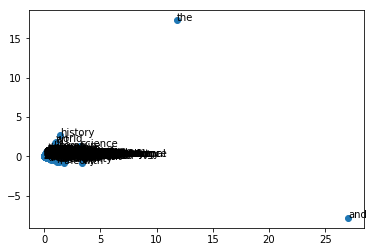

In [54]:
def main():
    svd = TruncatedSVD()
    Z = svd.fit_transform(X)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(D):
        plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
    plt.show()
if __name__ == '__main__':
    main()

LSA is an example of unsuperwised learning. LSA can be used for dimensionality reduction, we went from many dimensions down to two. 
WHY dimensionality reduction is usefull?
Ans is the processing time.